In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import PIL
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.
tqdm.pandas()

['labels.csv', 'train', 'test', 'train.csv', 'sample_submission.csv']


In [2]:
test_path = '../input/test/'
train_path = '../input/train/'

In [3]:
df_test = pd.DataFrame()
df_test['id'] = [x.split('.')[0] for x in os.listdir('../input/test/')]
print('create test dataframe!')

create test dataframe!


In [4]:
df_train = pd.read_csv('../input/train.csv')

In [5]:
def get_img_size(img_id, path):
            
    img = PIL.Image.open(f'{path}{img_id}.png')
    
    return img.size

In [6]:
df_test['shape'] = df_test['id'].progress_apply(lambda x : get_img_size(x, test_path))

100%|██████████| 7443/7443 [00:29<00:00, 248.51it/s]


In [7]:
width_list = [x[0] for x in df_test['shape'].values]
height_list = [x[1] for x in df_test['shape'].values]
df_test['width'] = width_list
df_test['height'] = height_list
del (width_list, height_list)
del df_test['shape']

In [8]:
df_train['shape'] = df_train['id'].progress_apply(lambda x : get_img_size(x, train_path))

100%|██████████| 109237/109237 [02:44<00:00, 664.55it/s]


In [9]:
width_list = [x[0] for x in df_train['shape'].values]
height_list = [x[1] for x in df_train['shape'].values]
df_train['width'] = width_list
df_train['height'] = height_list
del (width_list, height_list)
del df_train['shape']

In [10]:
# aspect ratio (Height / Width)
df_test['aspect_ratio'] = df_test.height / df_test.width
df_train['aspect_ratio'] = df_train.height / df_train.width

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Test set Image aspect_ratio')

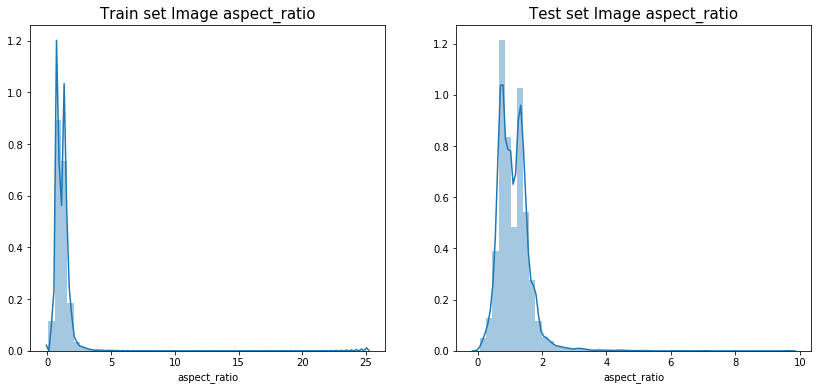

In [11]:
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.distplot(df_train.aspect_ratio)
plt.title('Train set Image aspect_ratio', fontsize=15)

plt.subplot(122)
sns.distplot(df_test.aspect_ratio)
plt.title('Test set Image aspect_ratio', fontsize=15)

In [12]:
df_test.aspect_ratio.sort_values().head().append(df_test.aspect_ratio.sort_values().tail())

3347    0.079428
897     0.113250
7349    0.116189
1113    0.116686
4905    0.119856
7357    5.220000
1940    5.263333
5414    6.193333
1345    7.100000
1859    9.620000
Name: aspect_ratio, dtype: float64

In [13]:
# test set aspect ratio
aspect_ratio_range = np.arange(0.05, 9.66, 0.05)

In [14]:
range_count = df_test.groupby(pd.cut(df_test.aspect_ratio, aspect_ratio_range)).aspect_ratio.count()

In [15]:
df_val = pd.DataFrame()
for idx, count_val in enumerate(range_count):
    
    low_bound = aspect_ratio_range[idx]
    high_bound = low_bound + 0.05
    append_idx = df_train.loc[(df_train.aspect_ratio >= low_bound) & (df_train.aspect_ratio < high_bound)].index
    
    if count_val == 0 or append_idx.shape[0] == 0:
        continue
    else:
        append_df = df_train.loc[(df_train.aspect_ratio >= low_bound) & (df_train.aspect_ratio < high_bound)]
        df_train = df_train.drop(index=append_idx)
        df_val = df_val.append(append_df.sample(count_val, random_state=42))


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Train set Image aspect_ratio')

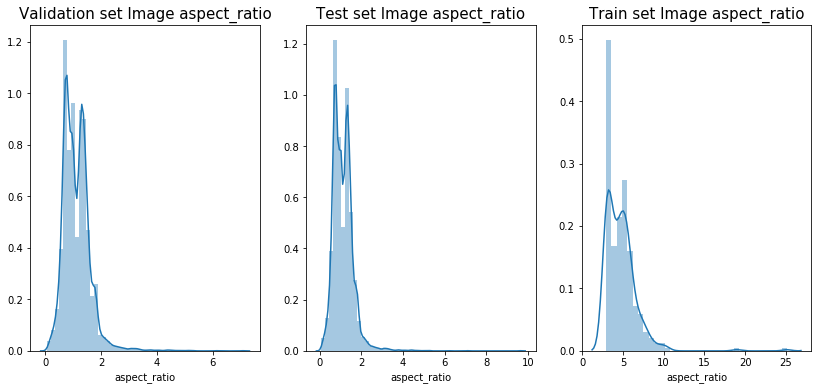

In [16]:
plt.figure(figsize=(14,6))
plt.subplot(131)
sns.distplot(df_val.aspect_ratio)
plt.title('Validation set Image aspect_ratio', fontsize=15)

plt.subplot(132)
sns.distplot(df_test.aspect_ratio)
plt.title('Test set Image aspect_ratio', fontsize=15)

plt.subplot(133)
sns.distplot(df_train.aspect_ratio)
plt.title('Train set Image aspect_ratio', fontsize=15)

In [17]:
df_val = df_val.drop(columns=['width', 'height', 'aspect_ratio'])
df_val.to_csv('validation.csv')